Hasil produksi: 4333.33


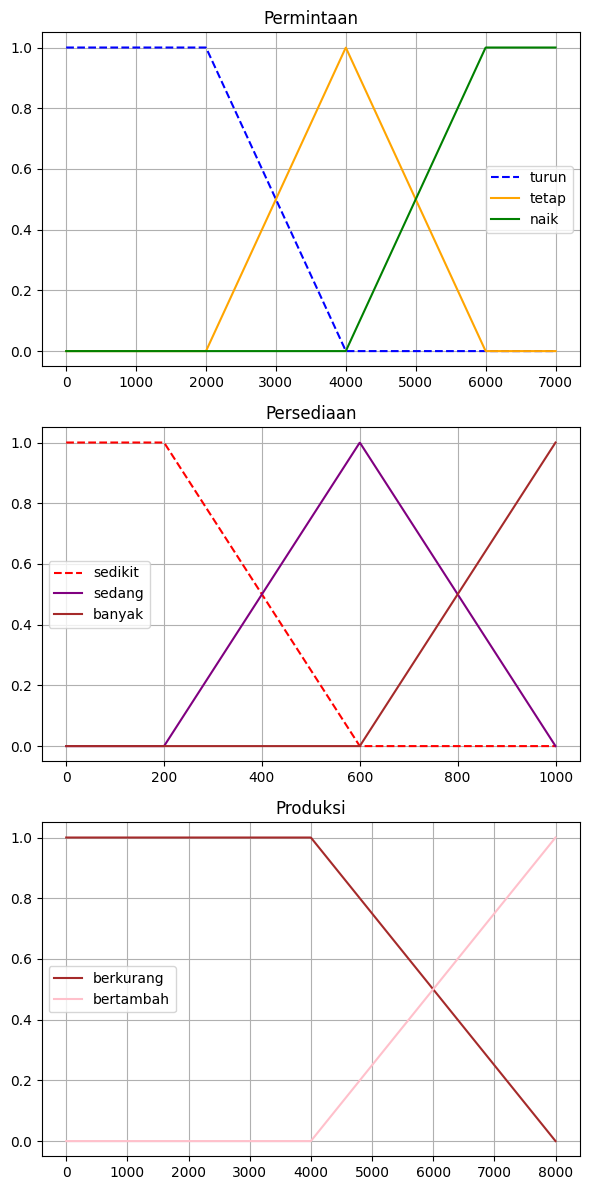

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk Permintaan
def permintaan_turun(x):
    return np.maximum(np.minimum((4000 - x) / 2000, 1), 0)

def permintaan_tetap(x):
    return np.maximum(np.minimum((x - 2000) / 2000, (6000 - x) / 2000), 0)

def permintaan_naik(x):
    return np.maximum(np.minimum((x - 4000) / 2000, 1), 0)

# Fungsi keanggotaan untuk Persediaan
def persediaan_sedikit(x):
    return np.maximum(np.minimum((600 - x) / 400, 1), 0)

def persediaan_sedang(x):
    return np.maximum(np.minimum((x - 200) / 400, (1000 - x) / 400), 0)

def persediaan_banyak(x):
    return np.maximum(np.minimum((x - 600) / 400, 1), 0)

# Fungsi keanggotaan untuk Produksi
def produksi_berkurang(z):
    return np.maximum(np.minimum((8000 - z) / 4000, 1), 0)

def produksi_bertambah(z):
    return np.maximum(np.minimum((z - 4000) / 4000, 1), 0)

# Defuzzifikasi Tsukamoto
def defuzzifikasi(rules):
    numerator = 0
    denominator = 0
    for alpha, z in rules:
        numerator += alpha * z
        denominator += alpha
    return numerator / denominator if denominator != 0 else 0

def fuzzy_inference(permintaan, persediaan):
    rules = []

    # Rule 1
    alpha1 = min(permintaan_turun(permintaan), persediaan_sedikit(persediaan))
    z1 = 7000
    rules.append((alpha1, z1))

    # Rule 2
    alpha2 = min(permintaan_turun(permintaan), persediaan_sedang(persediaan))
    z2 = 3000
    rules.append((alpha2, z2))

    # Rule 3
    alpha3 = min(permintaan_turun(permintaan), persediaan_banyak(persediaan))
    z3 = 3000
    rules.append((alpha3, z3))

    # Rule 4
    alpha4 = min(permintaan_tetap(permintaan), persediaan_sedikit(persediaan))
    z4 = 7000
    rules.append((alpha4, z4))

    # Rule 5
    alpha5 = min(permintaan_tetap(permintaan), persediaan_sedang(persediaan))
    z5 = 3000
    rules.append((alpha5, z5))

    # Rule 6
    alpha6 = min(permintaan_tetap(permintaan), persediaan_banyak(persediaan))
    z6 = 3000
    rules.append((alpha6, z6))

    # Rule 7
    alpha7 = min(permintaan_naik(permintaan), persediaan_sedikit(persediaan))
    z7 = 7000
    rules.append((alpha7, z7))

    # Rule 8
    alpha8 = min(permintaan_naik(permintaan), persediaan_sedang(persediaan))
    z8 = 7000
    rules.append((alpha8, z8))

    # Rule 9
    alpha9 = min(permintaan_naik(permintaan), persediaan_banyak(persediaan))
    z9 = 3000
    rules.append((alpha9, z9))

    return defuzzifikasi(rules)

# Inputnya
permintaan = 3500
persediaan = 500
produksi = fuzzy_inference(permintaan, persediaan)
print(f"Hasil produksi: {produksi:.2f}")

# Plot Fungsi Keanggotaan
x_permintaan = np.linspace(0, 7000, 1000)
x_persediaan = np.linspace(0, 1000, 1000)
z_produksi = np.linspace(0, 8000, 1000)

plt.figure(figsize=(6, 12))

# Plot Permintaan
plt.subplot(3, 1, 1)
plt.plot(x_permintaan, [permintaan_turun(i) for i in x_permintaan], 'b--', label='turun')
plt.plot(x_permintaan, [permintaan_tetap(i) for i in x_permintaan], 'orange', label='tetap')
plt.plot(x_permintaan, [permintaan_naik(i) for i in x_permintaan], 'g', label='naik')
plt.title("Permintaan")
plt.legend()
plt.grid()

# Plot Persediaan
plt.subplot(3, 1, 2)
plt.plot(x_persediaan, [persediaan_sedikit(i) for i in x_persediaan], 'r--', label='sedikit')
plt.plot(x_persediaan, [persediaan_sedang(i) for i in x_persediaan], 'purple', label='sedang')
plt.plot(x_persediaan, [persediaan_banyak(i) for i in x_persediaan], 'brown', label='banyak')
plt.title("Persediaan")
plt.legend()
plt.grid()

# Plot Produksi
plt.subplot(3, 1, 3)
plt.plot(z_produksi, [produksi_berkurang(i) for i in z_produksi], 'brown', label='berkurang')
plt.plot(z_produksi, [produksi_bertambah(i) for i in z_produksi], 'pink', label='bertambah')
plt.title("Produksi")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()